# pyPolyMesher Examples

This Jupyter Notebook serves as a comprehensive guide for using the pyPolyMesher library to generate polygonal meshes. pyPolyMesher is a Python library designed for polygon mesh generation and is particularly useful for various engineering and computational geometry applications.

## Purpose
The primary purpose of this notebook is to provide users with practical examples and detailed instructions on how to utilize pyPolyMesher effectively. We will explore different domains and scenarios to demonstrate the versatility of the library. The notebook contains code snippets and explanations for each domain, covering structured and unstructured mesh generation.

## What this Notebook Contains
This notebook is structured into sections, each dedicated to a specific example. In the following sections, you will find:

- Structured Mesh Generation: Demonstrating the generation of structured meshes.
- Unstructured Mesh Generation: Creating meshes using specified or randomly distributed points.
- Additional Configurations: Special cases or scenarios for specific domains, such as fixed points or unique features.
- Importing Domain from DXF Sketch
- Creation of a custom domains: A step-by-step guide on how to create new custom domains

By following the examples in this notebook, you can learn how to apply pyPolyMesher to your own projects and mesh generation tasks. Let's dive into the world of polygonal mesh generation with **pyPolyMesher**!

## Importing Essential Libraries and Functions

In this section, we begin by importing the necessary libraries and functions for our mesh generation examples. We'll make use of `numpy` for numerical operations and two key components from the `pyPolyMesher` library: `PolyMesher` function and `Domain` class. These are the core building blocks that allow us to create, manipulate, and visualize polygonal meshes for various domains.

In [1]:
import numpy as np
from pyPolyMesher import PolyMesher, Domain

## Example 1: Structured Mesh Generation on MBB Domain

**MBB Domain**: In structural engineering and topology optimization, the MBB (Material-Based Beam) domain is a specific type of design domain used to optimize the configuration of beams. Beams are structural elements primarily subjected to bending loads, and MBB domain topology optimization aims to find the optimal material distribution within the beam design domain. The objective is to maximize the beam's strength and stiffness while minimizing its weight. By default, the MBB domain is defined as a rectangle from (0,0) to (3,1).


**Visualization**:

- To visualize the MBB domain, you can use the `Plot` method provided for `Domain` class. This allows you to inspect the domain's geometry before mesh generation.

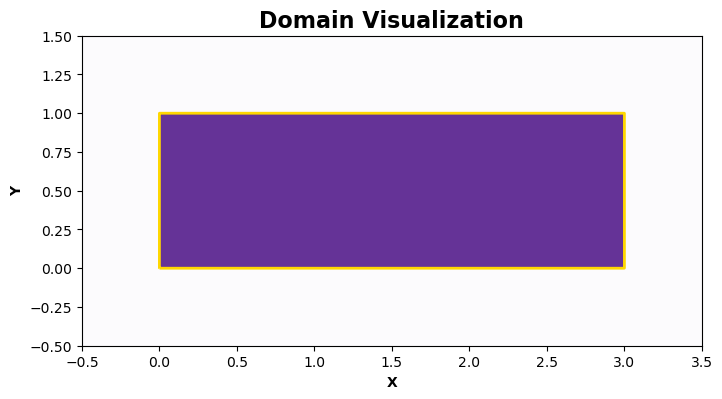

In [2]:
from pyPolyMesher.exampleDomains import MbbDomain

MbbDomain.Plot()

**Structured Mesh Generation**:
- In this example, we demonstrate the process of generating a structured mesh within the MBB domain.
- We define the dimensions of the structured mesh using parameters like `nelx` and `nely`, along with specifying the domain's size.
- The `numpy` library is used to create a grid of points within the MBB domain, ensuring a structured layout.
- We calculate the grid spacing (`dx` and `dy`) and create a mesh of points to represent the MBB domain.
- Utilizing the `PolyMesher` function, the structured mesh is generated based on the defined MBB domain and meshing parameters.
- The result is a structured mesh with information on nodes(`Nodes`), elements(`Elements`), support conditions (`Supp`), and loads (`Load`).

  100% (30 of 30) [##############################] 0:00:00 0:00:00 [Error: 0.000000 Min Error: 0.000000]     


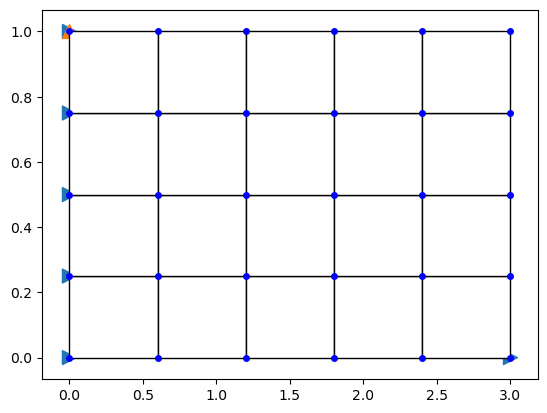

In [3]:
nelx = 5
nely = 4

dx = 3 / nelx
dy = 1 / nely

x_range = np.arange(dx / 2, 3, dx)
y_range = np.arange(dy / 2, 1, dy)

X, Y = np.meshgrid(x_range, y_range)
P = np.column_stack((X.ravel(), Y.ravel()))

Nodes, Elements, Supp, Load, P = PolyMesher(MbbDomain, 20, 30, P)

## Example 2: Unstructured Mesh Generation

The following domains are adapted from MATLAB PolyMesher program:

**Horn Domain**

The Horn domain represents a complex geometry. Here, we utilize the `PolyMesher` function to perform unstructured mesh generation on the Horn domain. The function takes parameters such as the domain (`HornDomain`), the desired number of elements (`NElem`), the maximum number of iterations (`MaxIter`). The `anim` flag enables visualization during the meshing process.

  100% (50 of 50) [##############################] 0:00:01 0:00:00 [Error: 0.003744 Min Error: 0.003744]     


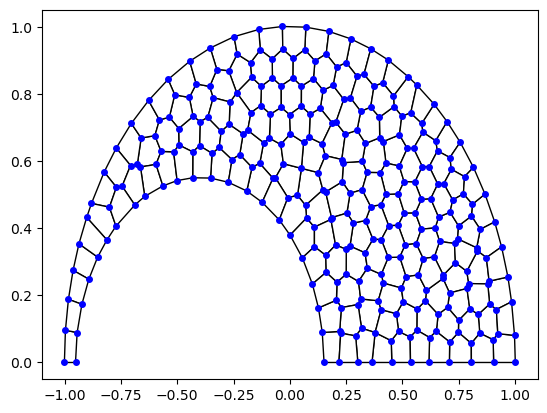

In [4]:
from pyPolyMesher.exampleDomains import HornDomain
Node, Element, Supp, Load, P = PolyMesher(HornDomain, 150, 50, anim=False)

**Wrench Domain**



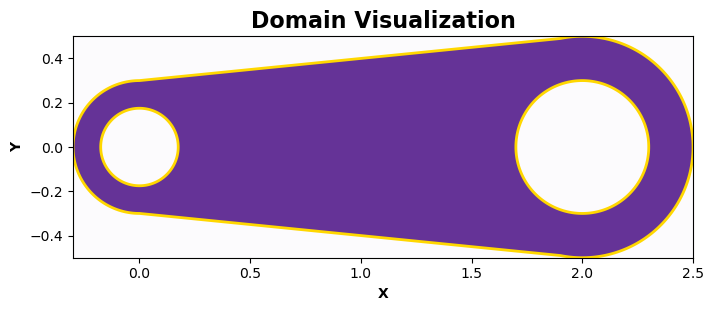

  100% (100 of 100) [##############################] 0:00:02 0:00:00 [Error: 0.002616 Min Error: 0.002059]    


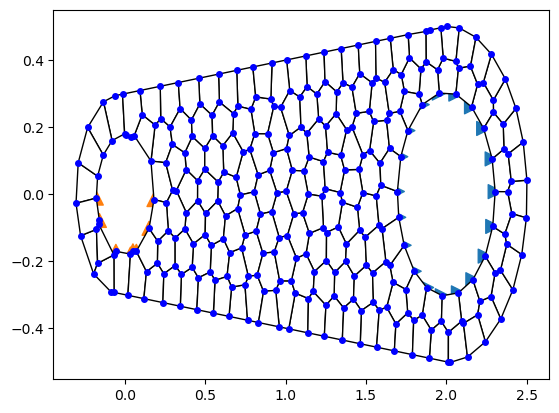

In [5]:
from pyPolyMesher.exampleDomains import WrenchDomain
WrenchDomain.Plot()
Node, Element, Supp, Load, P = PolyMesher(WrenchDomain, 150, 100)

**Michell Domain**


The Michell domain is used for unstructured mesh generation with the PolyMesher function. The function parameters include the domain (`MichellDomain`), the desired number of elements (`NElem`), the maximum number of iterations (`MaxIter`).

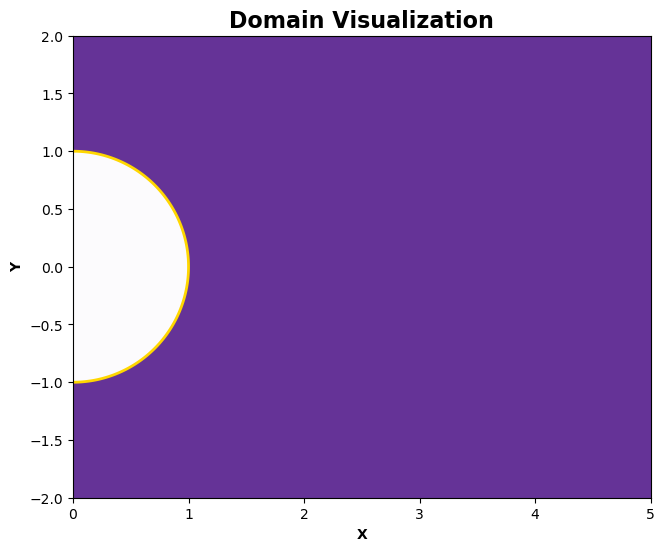

  100% (100 of 100) [##############################] 0:00:00 0:00:00 [Error: 0.004082 Min Error: 0.000465]    


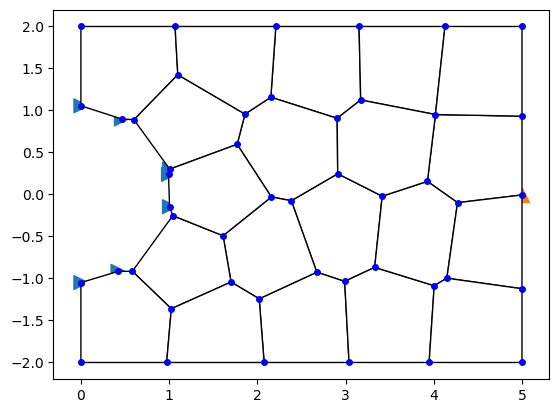

In [6]:
from pyPolyMesher.exampleDomains import MichellDomain
MichellDomain.Plot()
Node, Element, Supp, Load, P = PolyMesher(MichellDomain, NElem=20, MaxIter=100)

Additionally, users can enforce the mesher to consider specific points as nodes, termed as _fixed points_, by defining the `PFix` attribute of the `Domain`.

  100% (100 of 100) [##############################] 0:00:00 0:00:00 [Error: 0.003831 Min Error: 0.003301]    


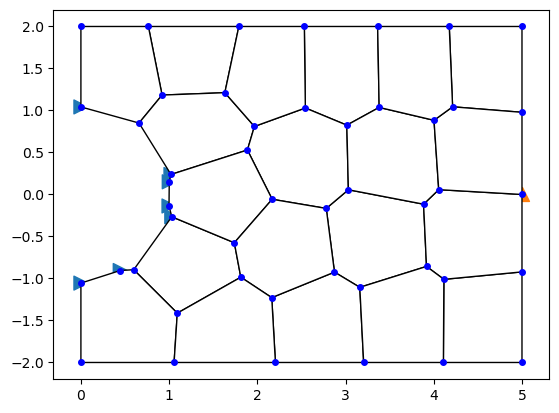

In [7]:
# with fixed points
MichellDomain.PFix = [5, 0]
Node, Element, Supp, Load, P = PolyMesher(MichellDomain, 20, 100)

**Suspension Domain**

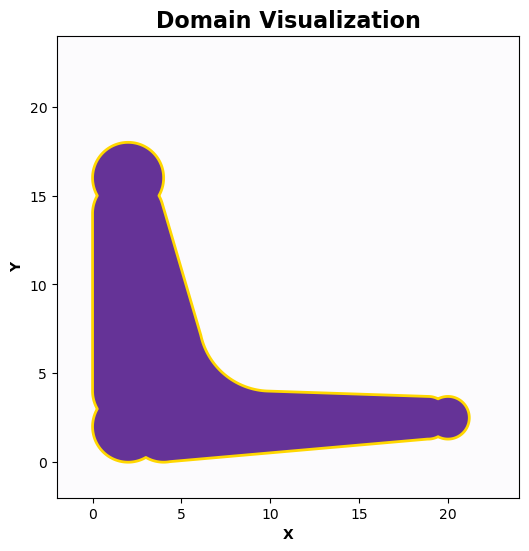

  100% (150 of 150) [##############################] 0:00:11 0:00:00 [Error: 0.005617 Min Error: 0.004008]    


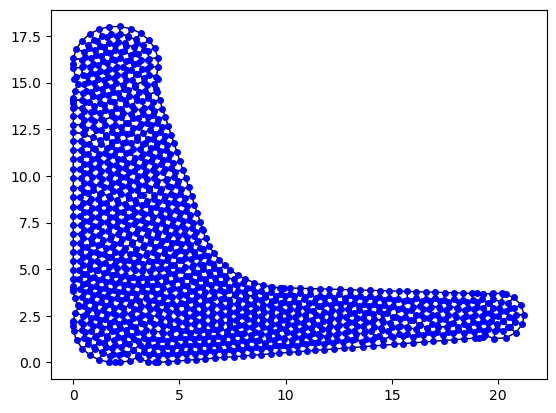

In [8]:
from pyPolyMesher.exampleDomains import SuspensionDomain
SuspensionDomain.Plot()
Node, Element, Supp, Load, P = PolyMesher(SuspensionDomain, 750, 150)

**Cook Membrane**

The Cook Membrane domain, a fundamental benchmark in computational mechanics, encapsulates the intricate behavior of thin elastic membranes under tension. Originally introduced by J.N. Reddy in 1984, this domain remains pivotal in evaluating numerical methods for solving partial differential equations governing membrane deformation. Despite its geometric simplicity, the Cook Membrane problem presents challenges in accurately capturing phenomena such as membrane stretching and potential wrinkling. Widely utilized in academia and industry, it serves as a testbed for advancing computational techniques and validating finite element models.

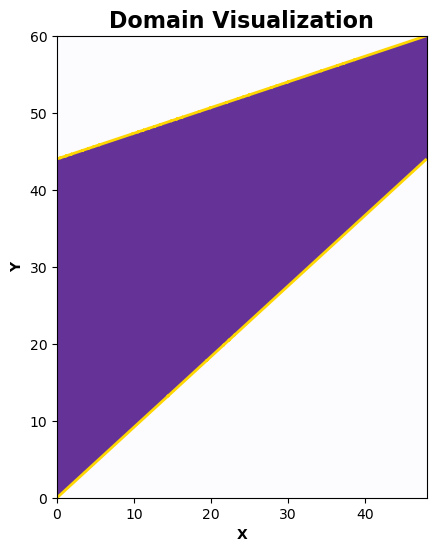

  100% (200 of 200) [##############################] 0:00:01 0:00:00 [Error: 0.001428 Min Error: 0.000971]    


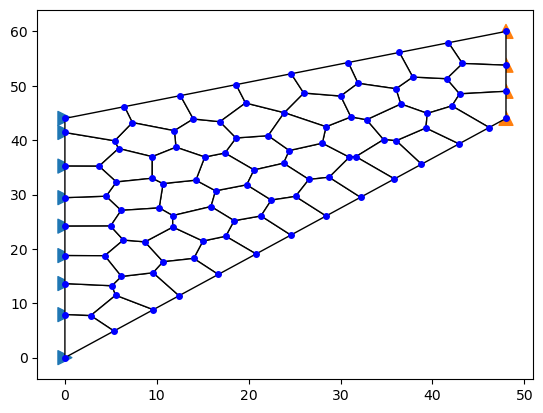

In [9]:
from pyPolyMesher.exampleDomains import CookDomain
CookDomain.Plot()
Node, Element, Supp, Load, P = PolyMesher(CookDomain, 50, 200)

## Example 3: Importing Polygon Domain from DXF
    
1. Import the necessary functions and modules from `pyPolyMesher` to handle DXF import and signed distance function creation.
2. Specify the path to the DXF file containing the polygon (`dxf_file_path`).
3. Import the polygon from the DXF file using `dxf_polygon` function and store in variable `v`.
4. Define a Signed Distance Function (SDF) using the imported polygon.
5. Create a `Domain` object representing the DXF Polygon Domain  with the specified bounds and SDF.
6. Plot the DXF Polygon Domain to visualize its geometry.
7. Perform mesh generation for the DXF Polygon Domain using PolyMesher, specifying the desired number of elements (`NElem`) and maximum iterations (`MaxIter`).

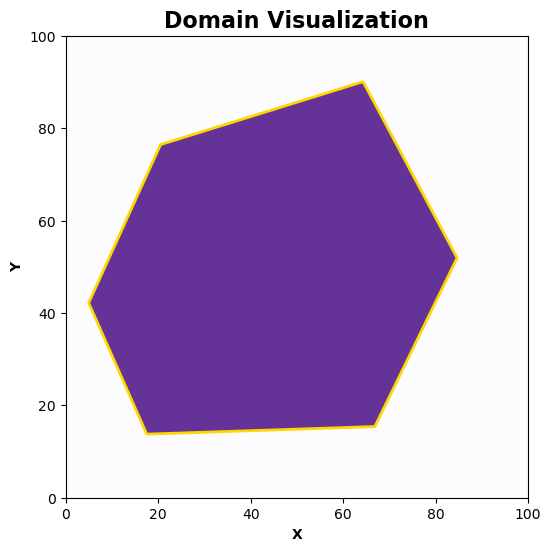

  100% (100 of 100) [##############################] 0:00:01 0:00:00 [Error: 0.000557 Min Error: 0.000557]    


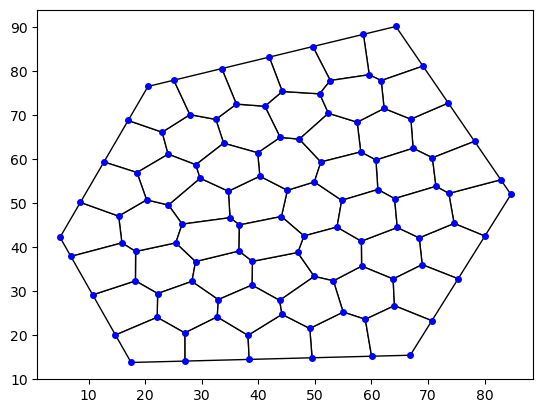

In [10]:
# Import necessary functions and modules
from pyPolyMesher.dxfImporter import dxf_polygon
from pyPolyMesher.dFunctions import dPolygon

# Specify the path to the DXF file containing the polygon
dxf_file_path = 'polygon1.dxf'

# Import the polygon from the DXF file
v = dxf_polygon(dxf_file_path)

# Define a Signed Distance Function (SDF) using the imported polygon
SDF = lambda P: dPolygon(P, v)

# Create a Domain object representing the DXF Polygon Domain
dxfDomain = Domain("DXF Polygon Domain", [0,100,0,100], SDF)

# Plot the DXF Polygon Domain
dxfDomain.Plot()

# Generate mesh for the DXF Polygon Domain using PolyMesher
# Specify the desired number of elements (NElem) and maximum iterations (MaxIter)
Node, Element, Supp, Load, P = PolyMesher(dxfDomain, 50, 100)

In [11]:
from pyPolyMesher import mesh_assessment

area = dxfDomain.CalculateArea() 
metrics = mesh_assessment(Node, Element, area, verbose = True)

Max. Mesh AR: 4.074172415174222
Average Mesh AR: 2.1498601661466488
Avg. Length: 6.403569778358955
Range of Areas: (71.02530740012071, 99.57287415848896)
Standard Deviation of Areas: 5.478526481547245
Total Area Error (%): -0.0321417922239635


 ## Example 4: Creation of a custom domains

In this example, we'll walk through the process of defining a custom mathematically defined domain.

In [12]:
# 1. Define the Bounding Box
# BdBox = [x0,y0,x1,y1]
#
# 2. Create a signed distance function
# def SDF(P):
#   # some codes to compute the signed distances of points P from domain edges
#   # you can use and combine available signed distance functions from pyPolyMesher.pydFunction module
#   return distances
#
# 3. Create a BC rule based on nodes coordinates (optional)
# def BC(nodes, BdBox):
#   # some codes to define node numbers for supported and loaded nodes
#   return [supp, load]
#
# 4. Create Domain object
# from pyPolyMesher import Domain
# NewDomain = Domain("My New Domain", BdBox, SDF, BC)
#
# 5. Plot the domain
# NewDomain.Plot()
#
# 6. Generate mesh
# from pyPolyMesher import PolyMesher
# Node, Element, Supp, Load, P = PolyMesher(NewDomain, NumberofElements, MaxIterations)


## Example 5: Heart Domain with mesh

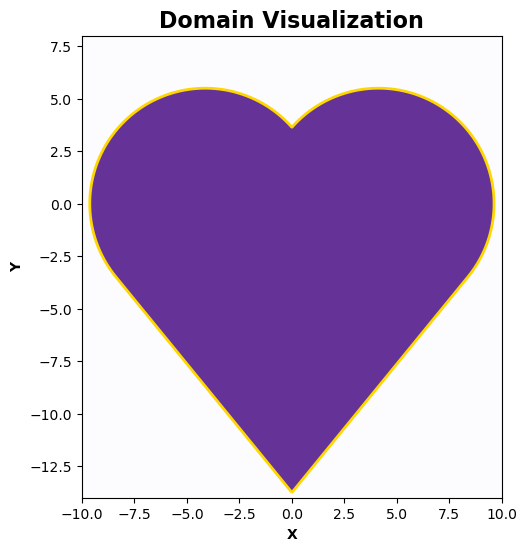

  100% (300 of 300) [##############################] 0:00:03 0:00:00 [Error: 0.000673 Min Error: 0.000405]    


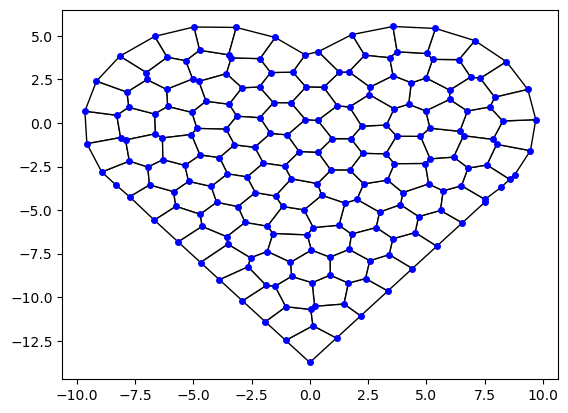

In [13]:
import numpy as np

# 1. Define the Bounding Box
BdBox = [-10, 10, -14, 8]
#
# 2. Create a signed distance function

from pyPolyMesher.dFunctions import dLine, dIntersect, dCircle, dUnion


def SDF2(p, r=5.5):
    """
    Calculate the signed distance from a point P to a heart shape defined by two circles and three line segments.

    The heart shape consists of two circles representing the left and right sides, and three line segments representing the bottom tip and the tangent lines connecting the circles.

    Parameters:
        p (tuple): A tuple containing the coordinates (x, y) of the point P.
        r (float): The radius of the heart shape. Default is 5.5.

    Returns:
        float: The signed distance from the point P to the heart shape. Negative values indicate that the point is inside the heart shape, zero indicates that the point is on the boundary, and positive values indicate that the point is outside the heart shape.

    Note:
        For more information please refer to: https://sadjadabedi.ir/post/constructing-complex-shapes-with-signed-distance-functions-the-heart-example/
    """
    # Some experimental ratio for the center of circles based on their radius
    a = r * 3 / 4

    circle1 = dCircle(p, -a, 0, r)  # Left Circle
    circle2 = dCircle(p, a, 0, r)  # Right Circle

    d2c = np.sqrt(
        (a - 0) ** 2 + (0 - 2 * a - r) ** 2
    )  # Distance from bottom tip to center of circles
    d2t = np.sqrt(d2c**2 - r**2)  # Distance to tangent point of circle

    tpr = find_tangent_point(
        a, 0, r, 0, -2 * a - r, d2t
    )  # Tangent point on right circle

    line1 = dLine(p, -tpr[0], tpr[1], 0, -2 * a - r)
    line2 = dLine(p, 0, -2 * a - r, tpr[0], tpr[1])
    line3 = dLine(p, tpr[0], tpr[1], -tpr[0], tpr[1])

    #    Create a triangle which base is the line that
    #    connects tangent points and the vertex point is heart bottom tip

    dl = dIntersect(line1, line2, line3)

    d = dUnion(circle1, circle2, dl)

    return d


def find_tangent_point(x1, y1, d1, x2, y2, d2):
    """
    Find the tangent point that has radius(d1) distance from center of circle
    and calculated distance (d2) from the bottom tip of the heart. The result is
    limited to desired tangent point.


    Inspired from following gist:
    https://gist.github.com/jupdike/bfe5eb23d1c395d8a0a1a4ddd94882ac?permalink_comment_id=4545858#gistcomment-4545858
    """

    centerdx = x1 - x2
    centerdy = y1 - y2
    R = np.sqrt(centerdx**2 + centerdy**2)

    if not (abs(d1 - d2) <= R <= d1 + d2):
        # No intersections
        return []

    d1d2 = d1**2 - d2**2
    a = d1d2 / (2 * R**2)

    c = np.sqrt(2 * (d1**2 + d2**2) / R**2 - (d1d2**2) / R**4 - 1)

    fx = (x1 + x2) / 2 + a * (x2 - x1)
    gx = c * (y2 - y1) / 2
    # ix1 = fx + gx
    ix2 = fx - gx

    fy = (y1 + y2) / 2 + a * (y2 - y1)
    gy = c * (x1 - x2) / 2
    # iy1 = fy + gy
    iy2 = fy - gy

    return [ix2, iy2]


# 4. Create Domain object
from pyPolyMesher import Domain

NewDomain = Domain("My New Domain", BdBox, SDF2)

# 5. Plot the domain
NewDomain.Plot()

# 6. Generate mesh
from pyPolyMesher import PolyMesher

Node, Element, Supp, Load, P = PolyMesher(NewDomain, 100, 300, anim=False)
